In [96]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Dataset 1 .csv')

In [97]:
df.head(5)

,Date\t,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,14-10-2011,08:26.6,-0.0469,-0.0385,0.00526,0.01126,36,51,0,0,0
1,14-10-2011,08:31.7,-0.0469,-0.0385,0.00526,0.01126,36,51,0,0,0
2,14-10-2011,08:33.3,-0.0469,-0.0385,0.00526,0.01126,36,51,0,0,0
3,14-10-2011,08:34.8,-0.0469,-0.0385,0.00526,0.01126,36,51,0,0,0
4,14-10-2011,08:35.8,-0.0469,-0.0385,0.00526,0.01126,36,51,0,0,0


In [98]:
df.describe()


,P1,P2,P3,P4,P5,P6,P7,P8,P9
count,180480.000000,180480.000000,180480.000000,180480.000000,180480.000000,180480.000000,180480.000000,180480.000000,180480.000000
mean,0.002096,-0.037450,0.005696,0.011111,36.645966,51.122335,0.008073,0.008428,0.008095
std,0.768409,0.231292,0.001263,0.001020,2.101132,3.462483,0.089486,0.091414,0.089608
min,-9.631300,-2.158900,-0.000450,0.004650,10.000000,12.000000,0.000000,0.000000,0.000000
25%,-0.046900,-0.038500,0.005470,0.010910,37.000000,51.000000,0.000000,0.000000,0.000000
50%,-0.046900,-0.038500,0.005720,0.011110,37.000000,52.000000,0.000000,0.000000,0.000000
75%,-0.046900,-0.038500,0.005820,0.011260,37.000000,52.000000,0.000000,0.000000,0.000000
max,10.678500,5.851500,0.012560,0.017520,39.000000,53.000000,1.000000,1.000000,1.000000


In [99]:
# Convert 'Date' and 'Time' columns to datetime

df['DateTime'] = pd.to_datetime(df['Date\t'] + ' ' + df['Time'], format='%d-%m-%Y %H:%M.%S', errors='coerce')

df.head(10)

,Date\t,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,DateTime
0,14-10-2011,08:26.6,-0.0469,-0.0385,0.00526,0.01126,36,51,0,0,0,2011-10-14 08:26:06
1,14-10-2011,08:31.7,-0.0469,-0.0385,0.00526,0.01126,36,51,0,0,0,2011-10-14 08:31:07
2,14-10-2011,08:33.3,-0.0469,-0.0385,0.00526,0.01126,36,51,0,0,0,2011-10-14 08:33:03
3,14-10-2011,08:34.8,-0.0469,-0.0385,0.00526,0.01126,36,51,0,0,0,2011-10-14 08:34:08
4,14-10-2011,08:35.8,-0.0469,-0.0385,0.00526,0.01126,36,51,0,0,0,2011-10-14 08:35:08
5,14-10-2011,08:36.3,-0.0469,-0.0385,0.00536,0.01126,36,51,0,0,0,2011-10-14 08:36:03
6,14-10-2011,08:37.9,-0.0469,-0.0385,0.00536,0.01126,36,51,0,0,0,2011-10-14 08:37:09
7,14-10-2011,08:39.4,-0.0469,-0.0385,0.00536,0.01126,36,51,0,0,0,2011-10-14 08:39:04
8,14-10-2011,08:43.0,-0.0469,-0.0385,0.00536,0.01126,36,51,0,0,0,2011-10-14 08:43:00
9,14-10-2011,08:48.1,-0.0469,-0.0385,0.00536,0.01126,36,51,0,0,0,2011-10-14 08:48:01


In [100]:
# Extract features for anomaly detection
# Here, I'm using only analog values P1-P9
analog_features = df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9']].values

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(analog_features)
normalized_features


array([[-0.06376271, -0.00453778, -0.34509956, ..., -0.0902143 ,
        -0.09219085, -0.09033906],
       [-0.06376271, -0.00453778, -0.34509956, ..., -0.0902143 ,
        -0.09219085, -0.09033906],
       [-0.06376271, -0.00453778, -0.34509956, ..., -0.0902143 ,
        -0.09219085, -0.09033906],
       ...,
       [-0.06376271, -0.00453778, -0.26594837, ..., -0.0902143 ,
        -0.09219085, -0.09033906],
       [-0.06376271, -0.00453778, -0.26594837, ..., -0.0902143 ,
        -0.09219085, -0.09033906],
       [-0.06376271, -0.00453778, -0.06015526, ..., -0.0902143 ,
        -0.09219085, -0.09033906]])

In [101]:
# Reshape the features for LSTM input (assuming a univariate time series)
lstm_features = normalized_features.reshape(-1, 1, analog_features.shape[1])

# Build and train an LSTM model (you might need to adjust architecture and parameters)
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(1, analog_features.shape[1])),
    tf.keras.layers.Dense(analog_features.shape[1])
])

model.compile(optimizer='adam', loss='mse')
model.fit(lstm_features, lstm_features, epochs=10, batch_size=32)

# Make predictions using the trained LSTM model
lstm_predictions = model.predict(lstm_features)


Epoch 1/10
5640/5640 [==============================] - 13s 2ms/step - loss: 0.9993
Epoch 2/10
5640/5640 [==============================] - 13s 2ms/step - loss: 0.9992
Epoch 3/10
5640/5640 [==============================] - 12s 2ms/step - loss: 0.9992
Epoch 4/10
5640/5640 [==============================] - 12s 2ms/step - loss: 0.9992
Epoch 5/10
5640/5640 [==============================] - 12s 2ms/step - loss: 0.9992
Epoch 6/10
5640/5640 [==============================] - 12s 2ms/step - loss: 0.9991
Epoch 7/10
5640/5640 [==============================] - 12s 2ms/step - loss: 0.9991
Epoch 8/10
5640/5640 [==============================] - 12s 2ms/step - loss: 0.9991
Epoch 9/10
5640/5640 [==============================] - 12s 2ms/step - loss: 0.9992
Epoch 10/10
5640/5640 [==============================] - 8s 1ms/step


In [109]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Adjust the number of components based on your needs
pca_result = pca.fit_transform(normalized_features)

# Concatenate LSTM predictions and PCA results
combined_features = np.concatenate([lstm_predictions, pca_result], axis=1)


In [110]:
# Apply trivial outlier detection (e.g., based on Z-score)
z_scores = np.abs((combined_features - combined_features.mean(axis=0)) / combined_features.std(axis=0))
threshold = 0.75
outliers = (z_scores > threshold).all(axis=1)

# Identify the anomalies in the original dataframe
anomalies=df[outliers]

# Print or visualize the anomalies
print(anomalies.head(3))


          Date\t     Time      P1      P2       P3       P4  P5  P6  P7  P8  \
2924  14-10-2011  25:07.0  3.6043 -0.0385  0.01256  0.01141  24  12   0   0   
2925  14-10-2011  25:08.6  3.6043 -0.0385  0.01256  0.01141  24  12   0   0   
2926  14-10-2011  25:10.1  3.6043 -0.0385  0.01256  0.01141  24  12   0   0   

      P9 DateTime  
2924   0      NaT  
2925   0      NaT  
2926   0      NaT  


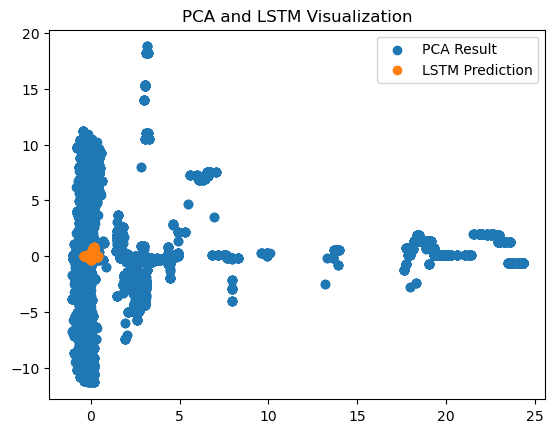

In [111]:
import matplotlib.pyplot as plt

# Visualize the data in the feature space
plt.scatter(pca_result[:, 0], pca_result[:, 1], label='PCA Result')
plt.scatter(lstm_predictions[:, 0], lstm_predictions[:, 1], label='LSTM Prediction')
plt.title('PCA and LSTM Visualization')
plt.legend()
plt.show()
